# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
> A model is linear when it assumes a linear relationship between explanatory variables in order to predict the outcome variable. It is linear in its weight of explanatory variables.
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
> The coefficient for a dummy variable shows the change in the outcome variable when the category represented by the dummy variable is present, relative to a baseline. With an intercept, the coefficient gives the adjustment in the outcome variable in comparision to the intercept when the dummy variable equals 1. 
3. Can linear regression be used for classification? Explain why, or why not.
> Linear regression cannot be used for classification because it's used to predict continuous output, not categorical outcomes. Linear regression models assume a linear output, but classification outputs are constrained to specific classes. 
4. What are signs that your linear model is over-fitting?
> Signs of an over-fitting linear model are high variance between training and test performance and high complexity/feature space. 
5. Clearly explain multi-colinearity using the two-stage least squares technique.
> Multi-colinearity is when explanatory variables in a regression model are highly correlated, making their coefficients unstable and sensitive to small changes in the data. Two-stage least squares technique involves first, regressing each problematic explanatory variable on the other explanatory variables and second, using those predicted values in the final regression model.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
> Adding polynomial terms of the features, nonlinear transformation of variables 
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
> The intercept represents the expected value of the outcome variable when (all) the explanatory variable(s) equal 0. The slope coefficient represents the expected change in y for one unit increase in the explanatory variable when all other variables are held constant. The dummy coefficient represents the difference in y when the category is present compared to the base case, holding all other variables constant. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented



1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [3]:
df = pd.read_csv('./data/Q1_clean.csv')
df.head()

df.loc[:,['Price','Neighbourhood ']].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

> The bourough Manhattan is most expensive on average, with a mean of $183.66 a night. 

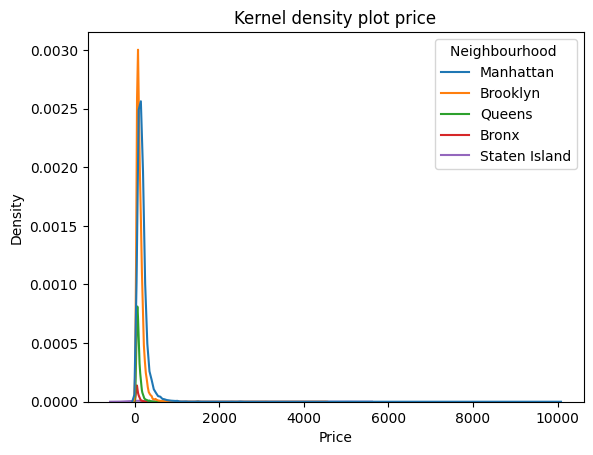

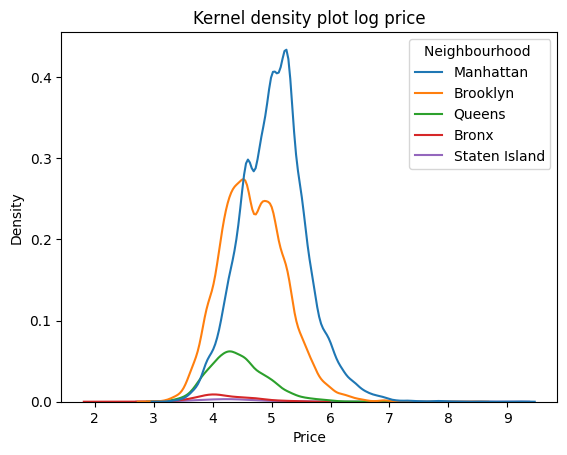

In [4]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood ']).set_title("Kernel density plot price")
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood ']).set_title("Kernel density plot log price")
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [7]:
from sklearn import linear_model

y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

reg_model = linear_model.LinearRegression(fit_intercept=False).fit(X,y)
results = pd.DataFrame({'var':reg_model.feature_names_in_, 'coef': reg_model.coef_})
results

,var,coef
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


> The coefficients of the neighborhood dummies is the same as the means by neighborhood. The coefficients in a regression of a continuous variable on one categorical variable is just group averages. 

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [9]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True)

reg_model = linear_model.LinearRegression(fit_intercept=True).fit(X,y)
results = pd.DataFrame({'var':reg_model.feature_names_in_, 'coef': reg_model.coef_})
results

,var,coef
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


> The creation of dummies involved dropping the Bronx, making it the reference category.

In [13]:
reg_model.intercept_

75.27649769584711

> The interecept is the same as the Bronx coefficient of the original regression. All coefficients from the new regression are the original coefficients minus the intercept. 

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [50]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 
rmse = np.sqrt(np.mean( (y_test - y_hat)**2))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

Rsq:  0.06543249195348955
RMSE:  129.02645184198352


,variable,coefficient
0,Review Scores Rating,1.070751
1,Bronx,-21.715003
2,Brooklyn,28.910140
3,Manhattan,84.866082
4,Queens,-1.809766
5,Staten Island,67.817606


> The most expensive kind of property you can rent is 100 rated property in Manhattan.

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [54]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Property Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '], dtype='int'),pd.get_dummies(X_train['Property Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '], dtype='int'),pd.get_dummies(X_test['Property Type'], dtype='int')],axis = 1)
Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)

print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

Rsq:  0.08727863020080984
RMSE:  122.43541468311301


,variable,coefficient
0,Review Scores Rating,1.009698
1,Bronx,-35.459242
2,Brooklyn,24.344705
3,Manhattan,85.813847
4,Queens,-7.477673
5,Staten Island,48.220589
6,Apartment,3.797921
7,Bed & Breakfast,-28.796351
8,Boat,59.754243
9,Bungalow,58.925249


> The most expensive kind of property you can rent is a 100 rated Condominium in Manhattan

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

> If the coefficient on Review Scores Rating changes from part 4 to 5, it means that Review Scores Rating became less powerful of a predictor after introducing Property Type. Some of the price variation can be explained by Property T1ype and therefore it became a more powerful predictor, decreasing the coefficient of Review Scores Rating